# Analysis of Yelp Dataset

In this notebook we will analyze a subset of Yelp's business, reviews and user data. The data was originally obtained from Kaggle but was then uploaded into an s3 bucket.

## Part 1:  Installation and Initial Setup
First we will validate that everything was setup correctly and do an initial check on current kernel packages.

In [1]:
%%info

In [2]:
sc.list_packages() # check kernel packages

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1619399119434_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

## Installing required packages for analysis and visualization

In [3]:
sc.install_pypi_package("pandas==1.2.4")
sc.install_pypi_package("matplotlib==3.4.1")
sc.install_pypi_package("seaborn==0.11.1")
sc.install_pypi_package("pyspark==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…




  Running setup.py bdist_wheel for pyspark: started
  Running setup.py bdist_wheel for pyspark: finished with status 'done'
  Stored in directory: /var/lib/livy/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark

In [4]:
sc.list_packages() # check kernel packages again to verify installation

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.10.0   
jmespath                   0.10.0   
joblib                     0.16.0   
kiwisolver                 1.3.1    
lxml                       4.5.2    
matplotlib                 3.4.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     1.2.4    
Pillow                     8.2.0    
pip                        9.0.1    
py-dateutil                2.2      
py4j                       0.10.9   
pyparsing                  2.4.7    
pyspark                    3.1.1    
python-dateutil            2.8.1    
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
s

## Importing Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading our Data
We load in our data into a dataframe object through spark from our s3 bucket.

In [6]:
tot_df = spark.read.json('s3://sta9760-datasets-jay/*.json')
bus_df = spark.read.json('s3://sta9760-datasets-jay/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of our data

In [7]:
#Display Total Columns & Rows & dataframe schema below
print(f'Total Columns: {len(bus_df.dtypes)}')
print(f'Total Rows: {bus_df.count():,}')
bus_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 160,585
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable

## Displaying the first 5 rows with columns:
1. business_id
2. name
3. city
4. state
5. stars
6. categories

In [8]:
bus_df["business_id", "name", "city", "state","stars", "categories"].show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

In [9]:
bus_df.select('business_id', 'name', 'city', 'state','stars', 'categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

## Part 2.  Analyzing Categories
We are interested in finding some information about the different categories in the dataset. Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as.

We would like to find find:
1. How many unique categories are represented in this dataset.
2. How many bunsinesses are categorized as Active Life.
3. What are the top 20 most popular categories available.

## Association Table 
We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.
For instance, given the following:

 | business_id | categories |
    |-------------|------------|
    | abcd123     | a,b,c      |

We would like to derive something like:

  | business_id | category |
  |-------------|------------|
  | abcd123     | a          |
  | abcd123     | b          |
  | abcd123     | c          |



What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Lets first show how our categories currently are

In [10]:
bus_df["business_id", "categories"].show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|Gyms, Active Life...|
|D4JtQNTI4X3Kcbzac...|   Restaurants, Thai|
|t35jsh9YnMtttm69U...|Dentists, Health ...|
|jFYIsSb7r1QeESVUn...|Breakfast & Brunc...|
|N3_Gs3DnX4k9SgpwJ...|Shopping, Jewelry...|
|tXvdYGvlEceDljN8g...|Barbers, Beauty &...|
+--------------------+--------------------+
only showing top 10 rows

Now we will try to show the first 5 rows of our association table

In [11]:
from pyspark.sql.functions import split, explode, col, desc

# split()--> split DataFrame string Column into multiple columns
# explode()--> used to explode an Array of Array columns to rows on PySpark DataFrame using python example.
#col()-->Returns a Column based on the given column name.
#desc()-->Returns a sort expression based on the descending order of the given column name.

split_categories = bus_df.select(bus_df.business_id, explode(split(bus_df.categories, ', ')).alias('category'))
split_categories.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|    category|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories
Finally we can find
1. How many unique categories are represented in this dataset


In [12]:
unique_cat = split_categories.select('category').distinct().count()
print('The total number of unique categories in this dataset is: ' + str(unique_cat))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The total number of unique categories in this dataset is: 1330

## Top Categories By Business
We will now try to find the top categories in the dataset by rolling up the categories

### Counts of Businesses / Category
So now, let's unroll our distinct count a bit and display the per count value of businesses per category.
The expected output should be:

   
  | category | count |
  |-------------|------------|
  | a    | 15          |
  | b    | 2           |
  | c    | 45          |


In [13]:
# The counts by category
cat_count = split_categories.groupby("category").count()
cat_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|  351|
|      Paddleboarding|   67|
|        Aerial Tours|    8|
|         Hobby Shops|  610|
|          Bubble Tea|  779|
|             Embassy|    9|
|             Tanning|  701|
|            Handyman|  507|
|      Aerial Fitness|   13|
|             Falafel|  141|
|        Summer Camps|  308|
|       Outlet Stores|  184|
|     Clothing Rental|   37|
|      Sporting Goods| 1864|
|     Cooking Schools|  114|
|  College Counseling|   20|
|  Lactation Services|   47|
|Ski & Snowboard S...|   55|
|             Museums|  336|
|              Doulas|   52|
+--------------------+-----+
only showing top 20 rows

In [14]:
# The top categories based on count
top_cat = cat_count.orderBy(desc('count')).show()
top_cat

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|50763|
|                Food|29469|
|            Shopping|26205|
|       Beauty & Spas|16574|
|       Home Services|16465|
|    Health & Medical|15102|
|      Local Services|12192|
|           Nightlife|11990|
|                Bars|10741|
|          Automotive|10119|
|Event Planning & ...| 9644|
|         Active Life| 9231|
|        Coffee & Tea| 7725|
|          Sandwiches| 7272|
|             Fashion| 6599|
|American (Traditi...| 6541|
|         Hair Salons| 5900|
|               Pizza| 5756|
|     Hotels & Travel| 5703|
|  Breakfast & Brunch| 5505|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories
Before we can plot it is more useful to convert our spark dataframe to a pandas dataframe and then utilize matplotlib/seaborn

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

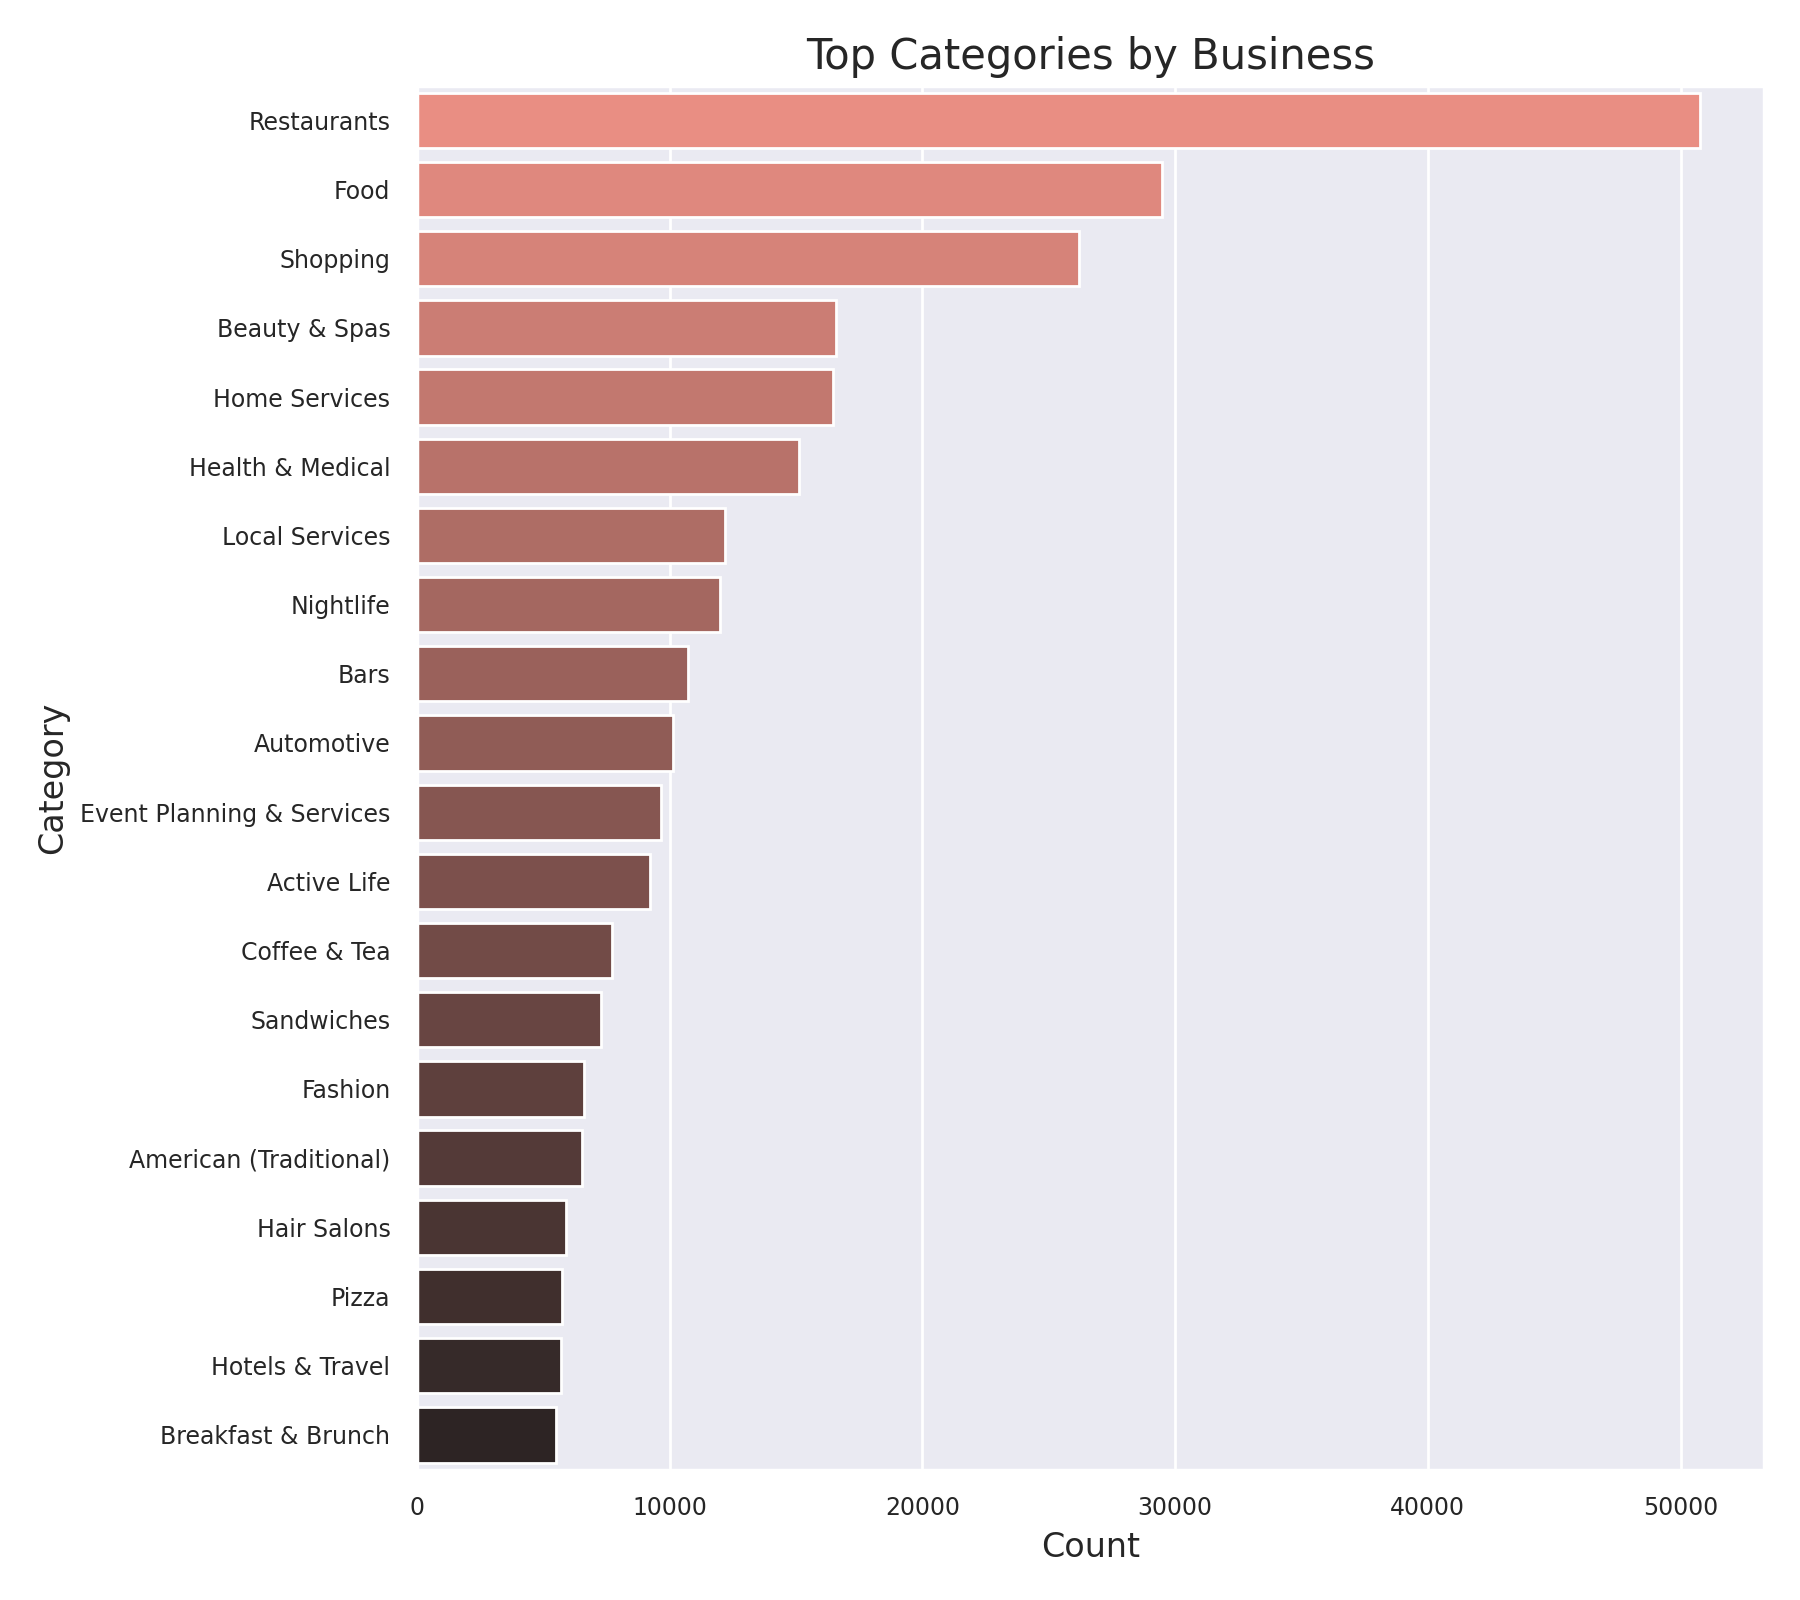

In [15]:
#Convert and store our Top 20 categories as a pandas dataframe object
top_cat = cat_count.orderBy(desc('count')).limit(20)
top_pdf = top_cat.toPandas()

#Set our seaborn theme and create our plot figure
sns.set_theme()
#palette options: "flare", "pastel", "light:#5A9", "ch:s=.25,rot=-.25 Greens_d", "YlOrBr", "Blues","dark:salmon_r"
plt.figure(figsize = (9,8), dpi=200)
axes = sns.barplot(x ='count', y ='category', data = top_pdf, palette="dark:salmon_r")

#Set title and labels
plt.title('Top Categories by Business', fontsize = 15)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Category', fontsize = 12)

plt.xticks(fontsize = 8.5)
plt.yticks(fontsize = 8.5)

plt.tight_layout()
%matplot plt


## Part 3. Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

### Loading User Data¶
Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [16]:
# Load in the review dataset
rev_df = spark.read.json('s3://sta9760-datasets-jay/yelp_academic_dataset_review.json')
rev_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [17]:
bus_star = rev_df["business_id", "stars"]
bus_star.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows


Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated ***by users who took the time to submit a written review.***

In [18]:
avg_bus_star = bus_star.groupBy('business_id').mean()
avg_bus_star.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|uEUweopM30lHcVxjO...|              3.0|
|wdBrDCbZopowEkIEX...|4.538461538461538|
|L3WCfeVozu5etMhz4...|              4.2|
|bOnsvrz1VkbrZM1jV...|              3.8|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
+--------------------+-----------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id

In [19]:
# select required columns from original business dataframe
target = bus_df.select('business_id','stars','name', 'city', 'state')

# join the two data frames based on business_id and stor into merge_df
merge_df =  avg_bus_star.join(target, how='inner',on='business_id')

# remove the business_id column from merged dataframe and show top 5
merge_df.drop('business_id').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+----------+-----+
|        avg(stars)|stars|                name|      city|state|
+------------------+-----+--------------------+----------+-----+
|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|
|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|
|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|
|               5.0|  5.0|          WonderWell|    Austin|   TX|
|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|
+------------------+-----+--------------------+----------+-----+
only showing top 5 rows


Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

The formula you can use is something like:

(row['avg(stars)'] - row['stars']) / row['stars']
If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

Using our merged dataframe we will calculate the skewness of our data and add that as a new colum to merge_df.

In [20]:
# First Attempt
merge_df1 = merge_df # create temp dataframe
merge_df1 = merge_df1.withColumnRenamed("avg(stars)","avg_stars") # rename because "avg(stars)" causes problem in sql
merge_df1.registerTempTable('merge_df_table')
skewDF = sqlContext.sql('select *, (avg_stars - stars) / stars as Skew from merge_df_table')
skewDF.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+-----+--------------------+----------+-----+--------------------+
|         business_id|         avg_stars|stars|                name|      city|state|                Skew|
+--------------------+------------------+-----+--------------------+----------+-----+--------------------+
|--JuLhLvq3gyjNnXT...|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|                 0.0|
|--_nBudPOb1lNRgKf...|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|            -0.03125|
|--kyOk0waSrCDlbSv...|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|-0.03333333333333...|
|--z9usx6Fin8P_f0v...|               5.0|  5.0|          WonderWell|    Austin|   TX|                 0.0|
|-0qeY1293steyCqYh...|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|-0.03571428571428571|
+--------------------+------------------+-----+--------------------+----------+-----+--------------------+
only showing top 5 rows

In [21]:
# Second Attempt to validate 
merge_skew = merge_df.withColumn('skew',  (col("avg(stars)") - col("stars")) / col("stars"))
merge_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+-----+--------------------+----------+-----+--------------------+
|         business_id|        avg(stars)|stars|                name|      city|state|                skew|
+--------------------+------------------+-----+--------------------+----------+-----+--------------------+
|--JuLhLvq3gyjNnXT...|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|                 0.0|
|--_nBudPOb1lNRgKf...|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|            -0.03125|
|--kyOk0waSrCDlbSv...|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|-0.03333333333333...|
|--z9usx6Fin8P_f0v...|               5.0|  5.0|          WonderWell|    Austin|   TX|                 0.0|
|-0qeY1293steyCqYh...|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|-0.03571428571428571|
+--------------------+------------------+-----+--------------------+----------+-----+--------------------+
only showing top 5 rows

And finally, graph it!

First we need to convert it to a pandas dataframe to plot with matplotlib/ seaborn like before.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

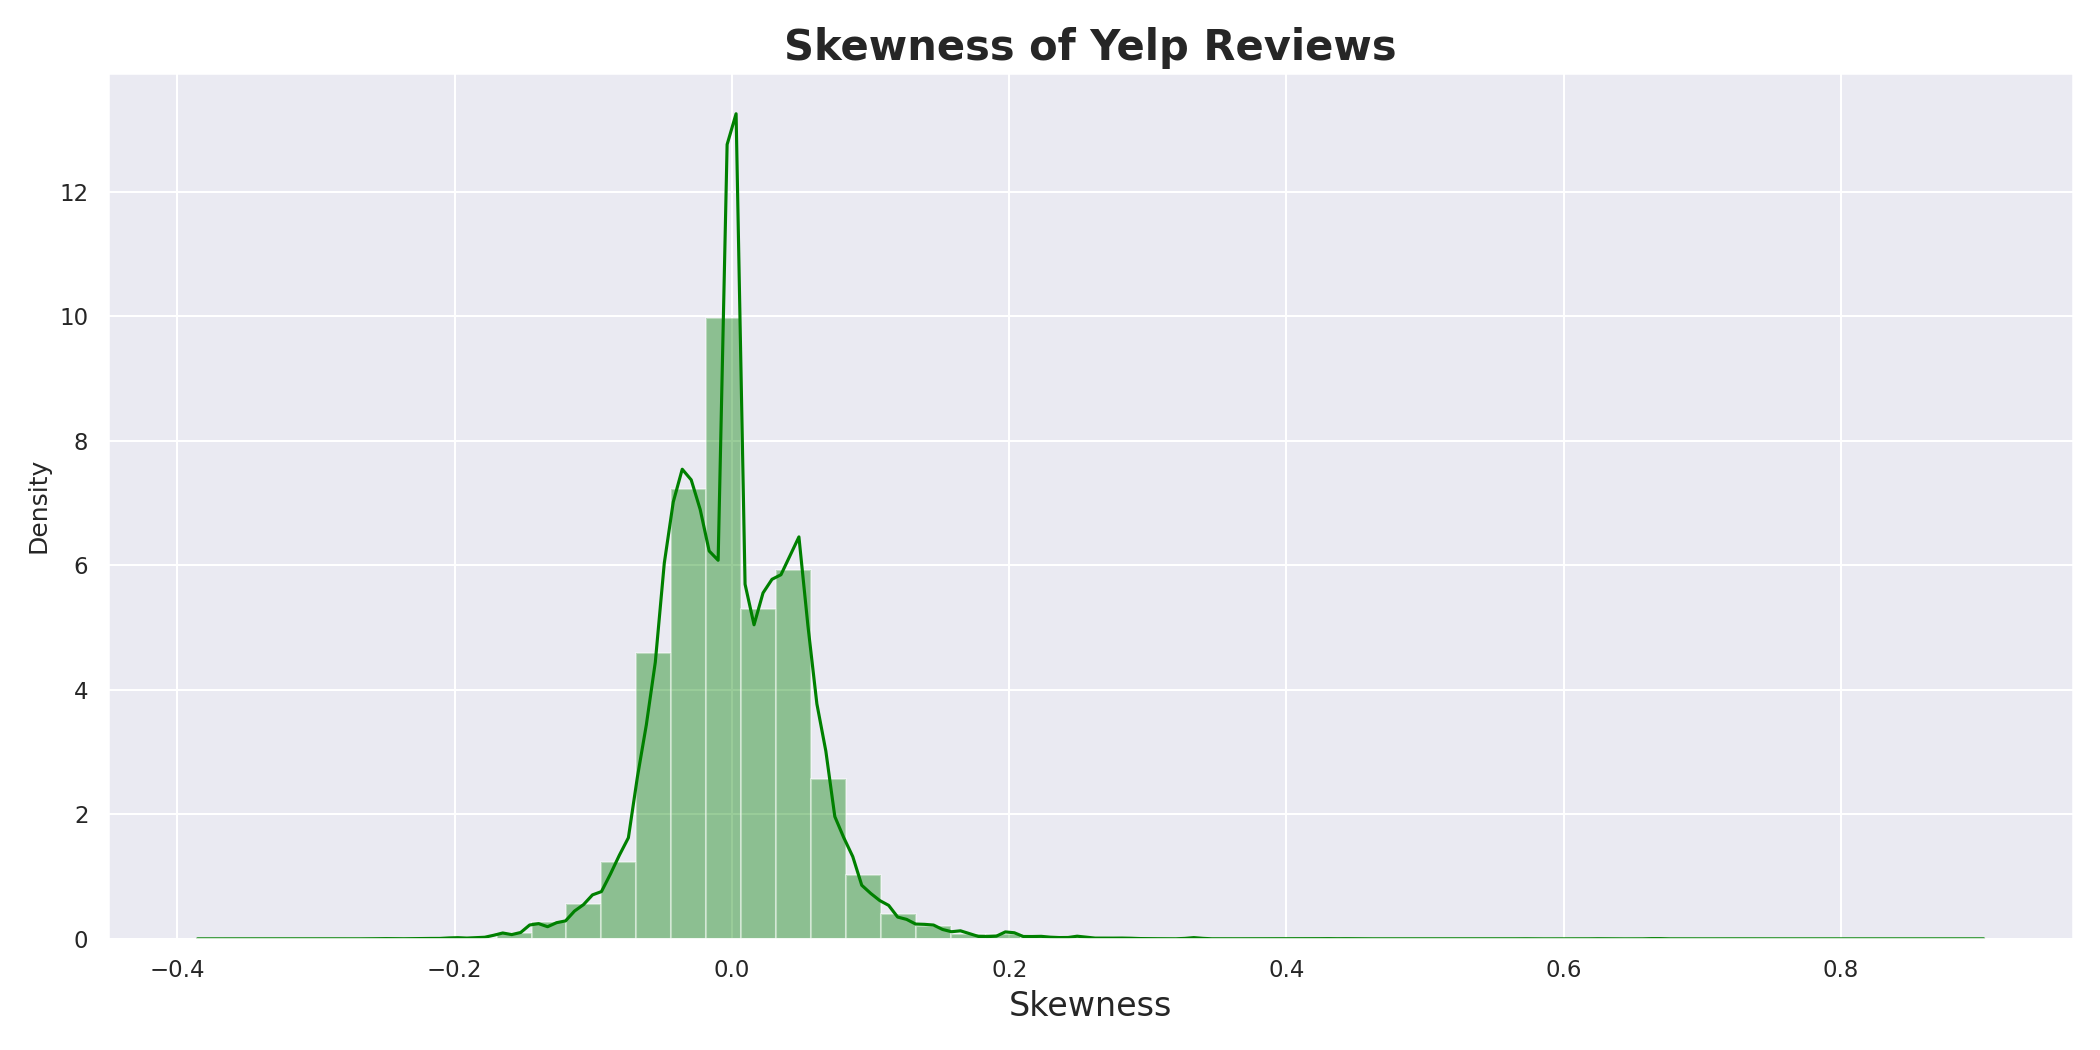

In [22]:
#convert to pandas df
skew_plot = merge_skew.select('skew').toPandas()

#Set our seaborn theme, plot dimensions and plot figure
plt.figure(figsize=(14,7), dpi = 150)
sns.set_theme()
sk_plot = sns.distplot(skew_plot,color='green', kde=True)
plt.title("Skewness of Yelp Reviews", weight='bold', size=20)
sk_plot.set_xlabel('Skewness', size=16)
plt.tight_layout()
%matplot plt


Before we make any comments on  the graph above we will go a little further and test for normality by also taking into account the kurtosis of the data

In [23]:
# Importing some additional packages
from scipy.stats import kurtosis
from scipy.stats import skew

# Cal mean and variance skew and kurtosis of the average star rating
sk_avg_star = merge_skew.select('avg(stars)').toPandas()
sk_mean = np.mean(sk_avg_star)
sk_var = np.var(sk_avg_star)

print("mean : ", list(sk_mean))
print("var  : ", list(sk_var))
print("skew : ",skew(sk_avg_star))
print("kurt : ",kurtosis(sk_avg_star))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

mean :  [3.6517699800262613]
var  :  [0.8639332056575321]
skew :  [-0.56305766]
kurt :  [-0.29322145]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

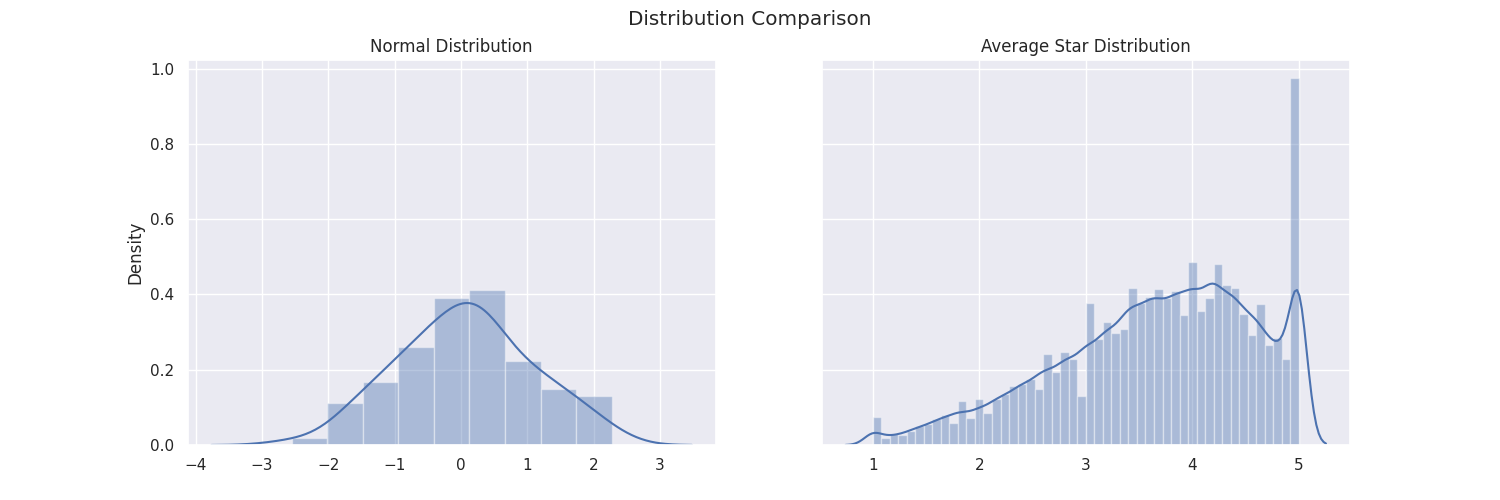

In [24]:
# Plotting Normal distribution and distribution of Average Star rating
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution Comparison')
axes[0].set_title('Title of the first chart')

# Normal Distribution
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
ax1 = sns.distplot(ax=axes[0],x=x)
axes[0].set_title("Normal Distribution")

# Avg Star Rating
ax2 = sns.distplot(ax=axes[1],x=sk_avg_star)
axes[1].set_title("Average Star Distribution")

%matplot plt

**Discussion**:
In Statistics and Finance, Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean.In other words it measures if density to the left of the mean is similar to the density to the right of the mean. Skewness can take on a negative or positive value with a value of 0 indicating perfect symmetry(no skew) while values less than -1 or greater than 1 indicate that the distribution is highly skewed.

On the otherhand Kurtosis refers to the shape of the distribution specifically it is a measure of how "heavy-tailed" or "light-tailed" a distribution is relative to the Normal Distribution. With that in mind we can see that data with high kurtosis have heavier tails indicating outliers while those with low kurtosis tend to have lighter tails and no outliers.

These two values are usually used in tandem to ascertain the "normality" of a dataset. Testing for normality is important because it allows those studying the data to be more careful and precise when choosing what methods and tools to use to best analyze the data. To answer the specific question posed we can see by inspecting our Skewness plot that the Yelp Reviews do indeed tend to skew negative (slightly) which is further confirmed when we calculated the skew and it had a value of ```-0.56305766```.This is also further confirmed by our distribution plot of the Average star rating which was left skewed i.e having a long left tail indicating a negative skew in the data.
When it comes to Kurtosis we calculated a value of ```-0.29322145``` which indicated our data had sligtly lighter tails than the normal distribution and was unlikely to contain outliers.

**Conclusion**:
Based on our plot and the calculated values we can say that the Yelp reviews tend to have a negative skew even if only slightly. We can also see that it likely that our data is not normal. 

## Part 4. Should the Elite be Trusted? 

Our final investigation into the Yelp dataset will be trying to ascertain how accurate or close the ratings of the ***elite*** users are to other ___non-elite___ users. We will utilize the **users** dataset and combine it with **business** and or **reviews** dataset and provide atleast one visualization.

In [25]:
# load the user data set
usr_df = spark.read.json('s3://sta9760-datasets-jay/yelp_academic_dataset_user.json')
usr_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

Upon seeing the schema lets take a look at the name, elite, review_count, average_stars columns etc.

In [26]:
peak = usr_df.select('user_id', 'name', 'elite', 'review_count', 'average_stars','cool', 'funny', 'useful','fans', 'yelping_since').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+--------------------+------------+-------------+-----+-----+------+----+-------------------+
|             user_id|     name|               elite|review_count|average_stars| cool|funny|useful|fans|      yelping_since|
+--------------------+---------+--------------------+------------+-------------+-----+-----+------+----+-------------------+
|q_QQ5kBBwlCcbL1s4...|     Jane|2006,2007,2008,20...|        1220|         3.85|11291|10030| 15038|1357|2005-03-14 20:26:35|
|dIIKEfOgo0KqUfGQv...|     Gabi|2007,2008,2009,20...|        2136|         4.09|18046|10289| 21272|1025|2007-08-10 19:01:51|
|D6ErcUnFALnCQN4b1...|    Jason|           2010,2011|         119|         3.76|  130|  128|   188|  16|2007-02-07 15:47:53|
|JnPIjvC0cmooNDfsa...|      Kat|2009,2010,2011,20...|         987|         3.77| 4035| 4722|  7234| 420|2009-02-09 16:14:29|
|37Hc8hr3cw0iHLoPz...|Christine|      2009,2010,2011|         495|         3.72| 1124|  727|  1577|  47|2008-03-03 04:57:05|


### Elite vs Non-elite %
When it comes to the elite column we see that it seems to be nested over the years for each elite yelper and therefore we need to first create associations tables like we did before. From there we can then separate based on elite status and calculate elite percentages and investigate the "useful" rating to help answer the question of trust.

In [27]:
#Splitting the elite column
split_elite = usr_df.select('user_id','name','useful', explode(split(usr_df.elite, ',')).alias('elite'))
split_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+------+-----+
|             user_id|name|useful|elite|
+--------------------+----+------+-----+
|q_QQ5kBBwlCcbL1s4...|Jane| 15038| 2006|
|q_QQ5kBBwlCcbL1s4...|Jane| 15038| 2007|
|q_QQ5kBBwlCcbL1s4...|Jane| 15038| 2008|
|q_QQ5kBBwlCcbL1s4...|Jane| 15038| 2009|
|q_QQ5kBBwlCcbL1s4...|Jane| 15038| 2010|
+--------------------+----+------+-----+
only showing top 5 rows

In [28]:
#Display Total Columns & Rows & dataframe schema below
print(f'Total Columns: {len(split_elite.dtypes)}')
print(f'Total Rows: {split_elite.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 4
Total Rows: 2,465,137

In [29]:
# Do a quick check on elite counts
split_elite.groupBy('elite').count().orderBy('count', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|elite|  count|
+-----+-------+
|     |2094043|
|   20|  84038|
| 2019|  47631|
| 2018|  44955|
| 2017|  39659|
| 2016|  32770|
| 2015|  27238|
| 2014|  20856|
| 2013|  18416|
| 2012|  17679|
| 2011|  12832|
| 2010|  10504|
| 2009|   6806|
| 2008|   4091|
| 2007|   2606|
| 2006|   1013|
+-----+-------+

In [30]:
# Do a quick check on elite useful counts
split_elite.groupBy('elite','useful').count().orderBy('count', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------+------+
|elite|useful| count|
+-----+------+------+
|     |     0|546528|
|     |     1|274846|
|     |     2|179677|
|     |     3|130621|
|     |     4|101030|
|     |     5| 80836|
|     |     6| 67207|
|     |     7| 56656|
|     |     8| 48912|
|     |     9| 42443|
|     |    10| 37780|
|     |    11| 33161|
|     |    12| 29675|
|     |    13| 26740|
|     |    14| 24020|
|     |    15| 21981|
|     |    16| 19917|
|     |    17| 18408|
|     |    18| 16920|
|     |    19| 15774|
+-----+------+------+
only showing top 20 rows

I am interested in first finding what percentage of the data is elite vs non-elite. From the elite count table above we can see that the empty space "  " respresents those reviews which were done by non-elite (```2094043``` in total) where as the other vals 20, 2019 and so on represent the counts for the number of elite reviews for each year. To find this percentage we need to separate the two. 

In [31]:
# Filter for elite and non-elite, count and calculate percentage
e_count = split_elite.filter(split_elite.elite != '')
print(f'Total elite: {e_count.count():,}')

ne_count = split_elite.filter(split_elite.elite == '')
print(f'Total non-elite: {ne_count.count():,}')

e_perc = round((e_count.count()/(e_count.count()+ne_count.count()))*100,2)
ne_perc = round((ne_count.count()/(e_count.count()+ne_count.count()))*100,2)

print("Therefore the dataset contains " + str(e_perc) +"% elites and "+ str(ne_perc) +"% of non-elites.")

#e_count.toPandas().info() # another way to check count
#e_count.summary().show() # another way to check count

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total elite: 371,094
Total non-elite: 2,094,043
Therefore the dataset contains 15.05% elites and 84.95% of non-elites.

Since there is such large disparity in the percentages between the two categories it doesnt make sense for us to investigate the "fan" counts or the "useful" rating count to make a decision on trust since it is likely the greatest counts will go to the non-elites. Therefore what we can do is focus on the ratings of each group.

In [32]:
# Attempt to create a pyspark dataframe of the percentages for plotting
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
data2 = [("Elite",371094),
    ("Non-Elite",2094043)
  ]

schema = StructType([ \
    StructField("Category",StringType(),True), \
    StructField("Count", IntegerType(), True) \
  ])
 
perc_df = spark.createDataFrame(data=data2,schema=schema)
#df.printSchema()
perc_df.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------+
|Category |Count  |
+---------+-------+
|Elite    |371094 |
|Non-Elite|2094043|
+---------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

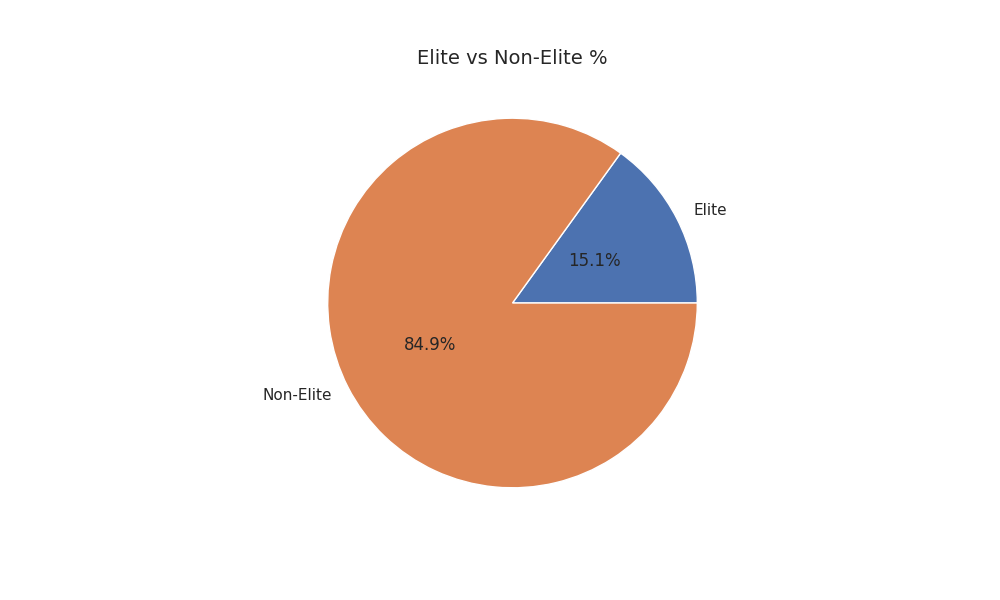

In [33]:
#Convert to pandas and prepare for plot
perc_tem= perc_df.toPandas()
perc_pl = perc_tem.groupby("Category")["Count"].sum()

#set the plot figure and plot pie chart
pie, ax = plt.subplots(figsize=[10,6])
labels = perc_pl.keys()
plt.pie(x=perc_pl, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Elite vs Non-Elite %", fontsize=14);
%matplot plt

In [34]:
# Use this cell to quickly review the schema for all 3 data sets.
rev_df.printSchema()
usr_df.printSchema()
bus_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)

## Joining the datasets


Elite users are not readily identified from the users dataset so we will split them as we did before and compare. But before we can do that it is required that we use at least one other dataset and join it to the users dataset. From reviewing the schemas above we see there isn't one singular id shared amongst them but between 2 datasets at a time case there are shared ids so we will use that to our advantage.

In [35]:
# First select useful fields from both dataset while renaming stars to differentiate from business star ratings
rev_df1 = rev_df.select('user_id','business_id','stars','date').withColumnRenamed('stars', 'rev_stars')
bus_df1 = bus_df.select('business_id', 'stars').withColumnRenamed('stars', 'bus_stars')

# now join review and business dataset
rev_bus_df = rev_df1.join(bus_df1, on = ['business_id'], how = 'inner')
rev_bus_df = rev_bus_df.select('business_id','user_id','rev_stars','bus_stars','date')
print('Review and Business dataset merged')
rev_bus_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Review and Business dataset merged
+--------------------+--------------------+---------+---------+-------------------+
|         business_id|             user_id|rev_stars|bus_stars|               date|
+--------------------+--------------------+---------+---------+-------------------+
|buF9druCkbuXLX526...|ak0TdVmGKo4pwqdJS...|      4.0|      3.5|2014-10-11 03:34:02|
|RA4V8pr014UyUbDvI...|YoVfDbnISlW0f7abN...|      4.0|      3.0|2015-07-03 20:38:25|
|_sS2LBIGNT5NQb6PD...|eC5evKn1TWDyHCyQA...|      5.0|      5.0|2013-05-28 20:38:06|
|0AzLzHfOJgL7ROwhd...|SFQ1jcnGguO0LYWnb...|      2.0|      3.5|2010-01-08 02:29:15|
|8zehGz9jnxPqXtOc7...|0kA0PAJ8QFMeveQWH...|      4.0|      4.5|2011-07-28 18:05:01|
+--------------------+--------------------+---------+---------+-------------------+
only showing top 5 rows

In [36]:
# We need to change the date values to make them more readable and easier to plot 
from pyspark.sql.functions import to_date, year, mean

rev_bus_df = rev_bus_df.select('business_id', 'user_id','rev_stars','bus_stars',
                         year(to_date(rev_bus_df.date, 'yyyy-MM-dd HH:mm:ss')).alias('year'))
rev_bus_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+---------+----+
|         business_id|             user_id|rev_stars|bus_stars|year|
+--------------------+--------------------+---------+---------+----+
|buF9druCkbuXLX526...|ak0TdVmGKo4pwqdJS...|      4.0|      3.5|2014|
|RA4V8pr014UyUbDvI...|YoVfDbnISlW0f7abN...|      4.0|      3.0|2015|
|_sS2LBIGNT5NQb6PD...|eC5evKn1TWDyHCyQA...|      5.0|      5.0|2013|
|0AzLzHfOJgL7ROwhd...|SFQ1jcnGguO0LYWnb...|      2.0|      3.5|2010|
|8zehGz9jnxPqXtOc7...|0kA0PAJ8QFMeveQWH...|      4.0|      4.5|2011|
+--------------------+--------------------+---------+---------+----+
only showing top 5 rows

In [37]:
# Now to join the above dataset with the elite dataset
split_elite1 = split_elite.select('user_id','elite')
total_df = rev_bus_df.join(split_elite1,on='user_id', how='inner')
print("Total merged dataframe")
total_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total merged dataframe
+--------------------+--------------------+---------+---------+----+-----+
|             user_id|         business_id|rev_stars|bus_stars|year|elite|
+--------------------+--------------------+---------+---------+----+-----+
|--1UpCuUDJQbqiuFX...|GgR7kcKykuqXB11fW...|      5.0|      4.5|2018|     |
|--3Bk72HakneTyp3D...|rxNfidGLHtMYyLNeo...|      5.0|      4.5|2017|     |
|--3Hl2oAvTPlq-f7K...|2OaX6XjAoI7VD6jLd...|      2.0|      4.0|2016|     |
|--3Hl2oAvTPlq-f7K...|IfOj3AxPl3Exsd_Yl...|      1.0|      4.0|2016|     |
|--3Hl2oAvTPlq-f7K...|bAuYOa-VuqTOnKzWN...|      2.0|      4.5|2013|     |
+--------------------+--------------------+---------+---------+----+-----+
only showing top 5 rows

In [38]:
# Split elite and non elite again but now from total_df
elite = total_df.filter(total_df.elite != '')
non_elite = total_df.filter(total_df.elite == '')
print('Elite Data')
elite.show(5)
print('Non-elite Data')
non_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Elite Data
+--------------------+--------------------+---------+---------+----+-----+
|             user_id|         business_id|rev_stars|bus_stars|year|elite|
+--------------------+--------------------+---------+---------+----+-----+
|--cd_gA-9Q8gM9P2c...|irdrKokOvuxP_atEj...|      5.0|      4.0|2019| 2019|
|--cd_gA-9Q8gM9P2c...|irdrKokOvuxP_atEj...|      5.0|      4.0|2019|   20|
|--cd_gA-9Q8gM9P2c...|irdrKokOvuxP_atEj...|      5.0|      4.0|2019|   20|
|--cd_gA-9Q8gM9P2c...|y53Y_93Tz90HpefKQ...|      4.0|      3.5|2019| 2019|
|--cd_gA-9Q8gM9P2c...|y53Y_93Tz90HpefKQ...|      4.0|      3.5|2019|   20|
+--------------------+--------------------+---------+---------+----+-----+
only showing top 5 rows

Non-elite Data
+--------------------+--------------------+---------+---------+----+-----+
|             user_id|         business_id|rev_stars|bus_stars|year|elite|
+--------------------+--------------------+---------+---------+----+-----+
|--1UpCuUDJQbqiuFX...|GgR7kcKykuqXB11fW...|      

### Calculating the Average Ratings Over the Years
We can now focus on the ratings of elites and non-elites over the years and see how close or far they are from each other.

In [39]:
# Elite
elite_avg_year = elite.groupBy('year').agg(mean('rev_stars'),mean('bus_stars'))
elite_avg_year = elite_avg_year.withColumnRenamed('avg(rev_stars)', 'elite_review_ratings')
elite_avg_year = elite_avg_year.withColumnRenamed('avg(bus_stars)', 'elite_bus_ratings')
print('Elite')
elite_avg_year.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Elite
+----+--------------------+------------------+
|year|elite_review_ratings| elite_bus_ratings|
+----+--------------------+------------------+
|2007|  3.7514907966258604| 3.596941862810507|
|2018|  3.9965006580540647| 3.856401355836273|
|2010|   3.722710438013602| 3.647125779594581|
|2011|   3.719965140470805| 3.643982575272907|
|2017|  3.9535886148730306|3.8365759289235255|
+----+--------------------+------------------+
only showing top 5 rows

In [40]:
# Non-elite
n_elite_avg_year = non_elite.groupBy('year').agg(mean('rev_stars'),mean('bus_stars'))
n_elite_avg_year = n_elite_avg_year.withColumnRenamed('avg(rev_stars)', 'non_elite_review_ratings')
n_elite_avg_year = n_elite_avg_year.withColumnRenamed('avg(bus_stars)', 'non_elite_bus_ratings')
print('Non-elite')
n_elite_avg_year.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Non-elite
+----+------------------------+---------------------+
|year|non_elite_review_ratings|non_elite_bus_ratings|
+----+------------------------+---------------------+
|2007|       3.768732038971052|    3.621486647508236|
|2018|      3.6917618752780923|   3.7610583634869776|
|2010|       3.690827662895443|   3.6660783693622925|
|2011|      3.6600346020761245|   3.6569018045465196|
|2017|       3.698152194184494|    3.745056894041101|
+----+------------------------+---------------------+
only showing top 5 rows

#### Now we can join the two datasets together and plot

In [41]:
total_avg = elite_avg_year.join(n_elite_avg_year, on = 'year', how = 'outer')
total_avg = total_avg.sort('year')
total_avg =total_avg.select('year','elite_review_ratings','non_elite_review_ratings','elite_bus_ratings','non_elite_bus_ratings')
total_avg.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+--------------------+------------------------+------------------+---------------------+
|year|elite_review_ratings|non_elite_review_ratings| elite_bus_ratings|non_elite_bus_ratings|
+----+--------------------+------------------------+------------------+---------------------+
|2004|   3.562200956937799|       4.285714285714286| 3.647129186602871|    3.738095238095238|
|2005|   3.824107464839524|       3.924960753532182| 3.533447529751172|   3.5411302982731554|
|2006|   3.820479122323329|      3.8203187250996016|3.5702255617616387|     3.61128818061089|
|2007|  3.7514907966258604|       3.768732038971052| 3.596941862810507|    3.621486647508236|
|2008|  3.6999801379553863|      3.7312761730913775| 3.583479437879616|   3.6423681949962416|
|2009|   3.706608980078526|        3.69283741009512|3.6168725103262123|    3.655188105574304|
|2010|   3.722710438013602|       3.690827662895443| 3.647125779594581|   3.6660783693622925|
|2011|   3.719965140470805|      3.6600346020761245| 3.64398

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

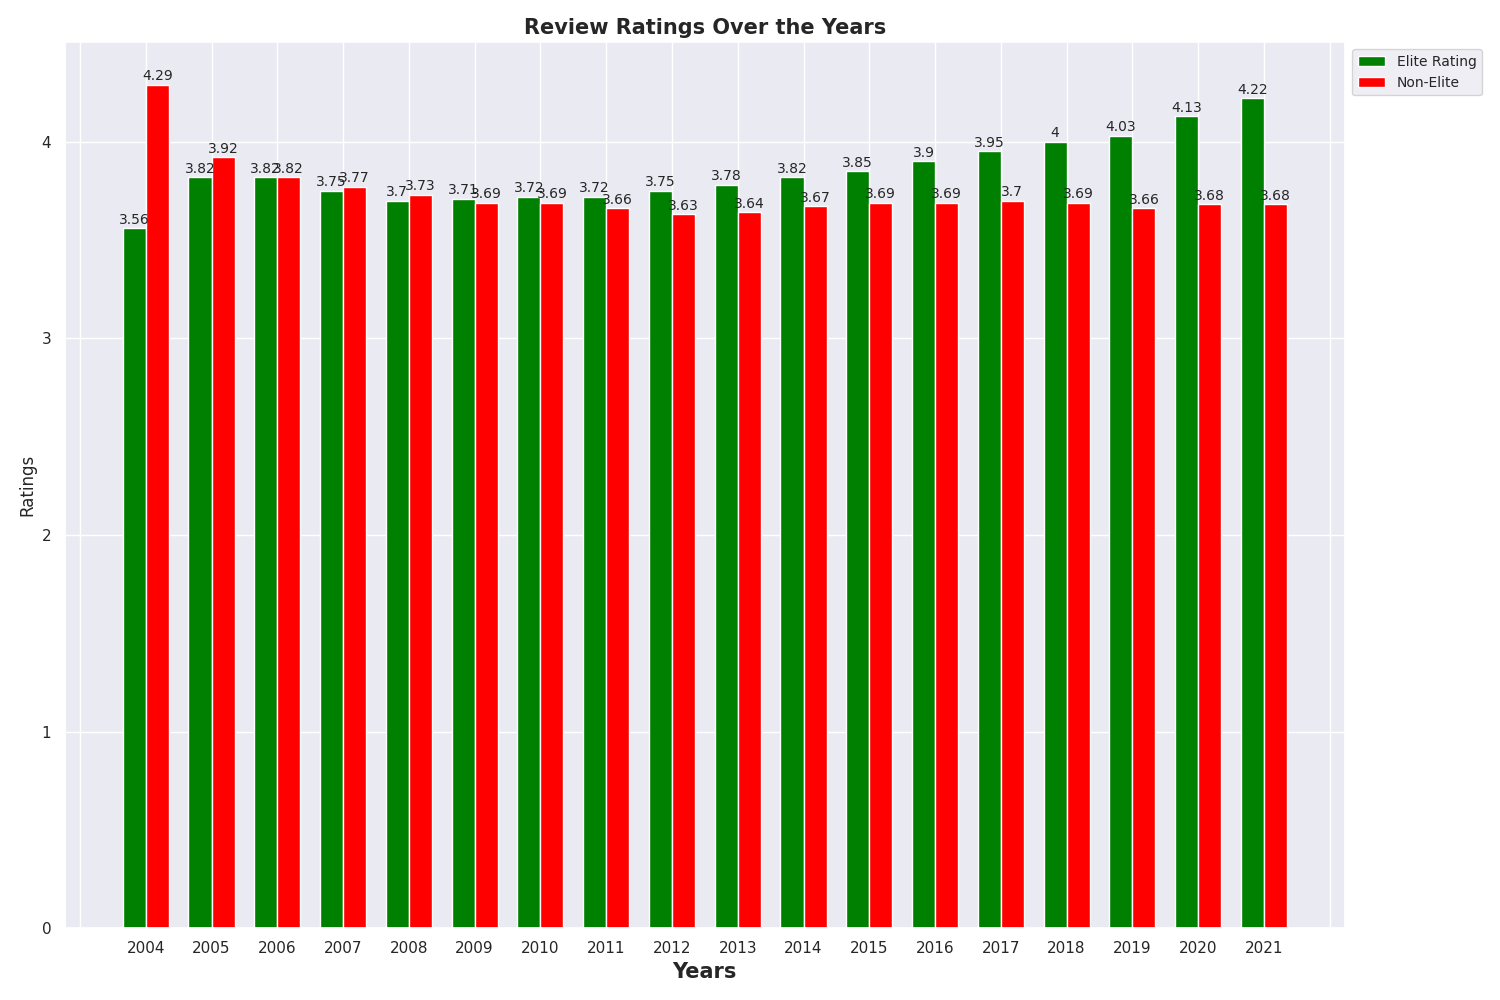

In [42]:
# Plotting Review Stars
import matplotlib.ticker as plticker
avg_plot = total_avg.toPandas()
avg_plot = round(avg_plot,2)
labels = avg_plot.year
x = np.arange(len(labels)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
rects1 = ax.bar(x - width/2,avg_plot.elite_review_ratings,width,color='green', label='Elite Rating')
rects2 = ax.bar(x + width/2,avg_plot.non_elite_review_ratings,width,color='red', label='Non-Elite')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratings')
ax.set_xlabel('Years',weight='bold', size=15)
ax.set_title('Review Ratings Over the Years',weight='bold', size=15)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=0,ha='center')
ax.legend( bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
ax.bar_label(rects1, padding=1,fontsize=10)
ax.bar_label(rects2, padding=1,fontsize=10)

loc = plticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

fig.tight_layout()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

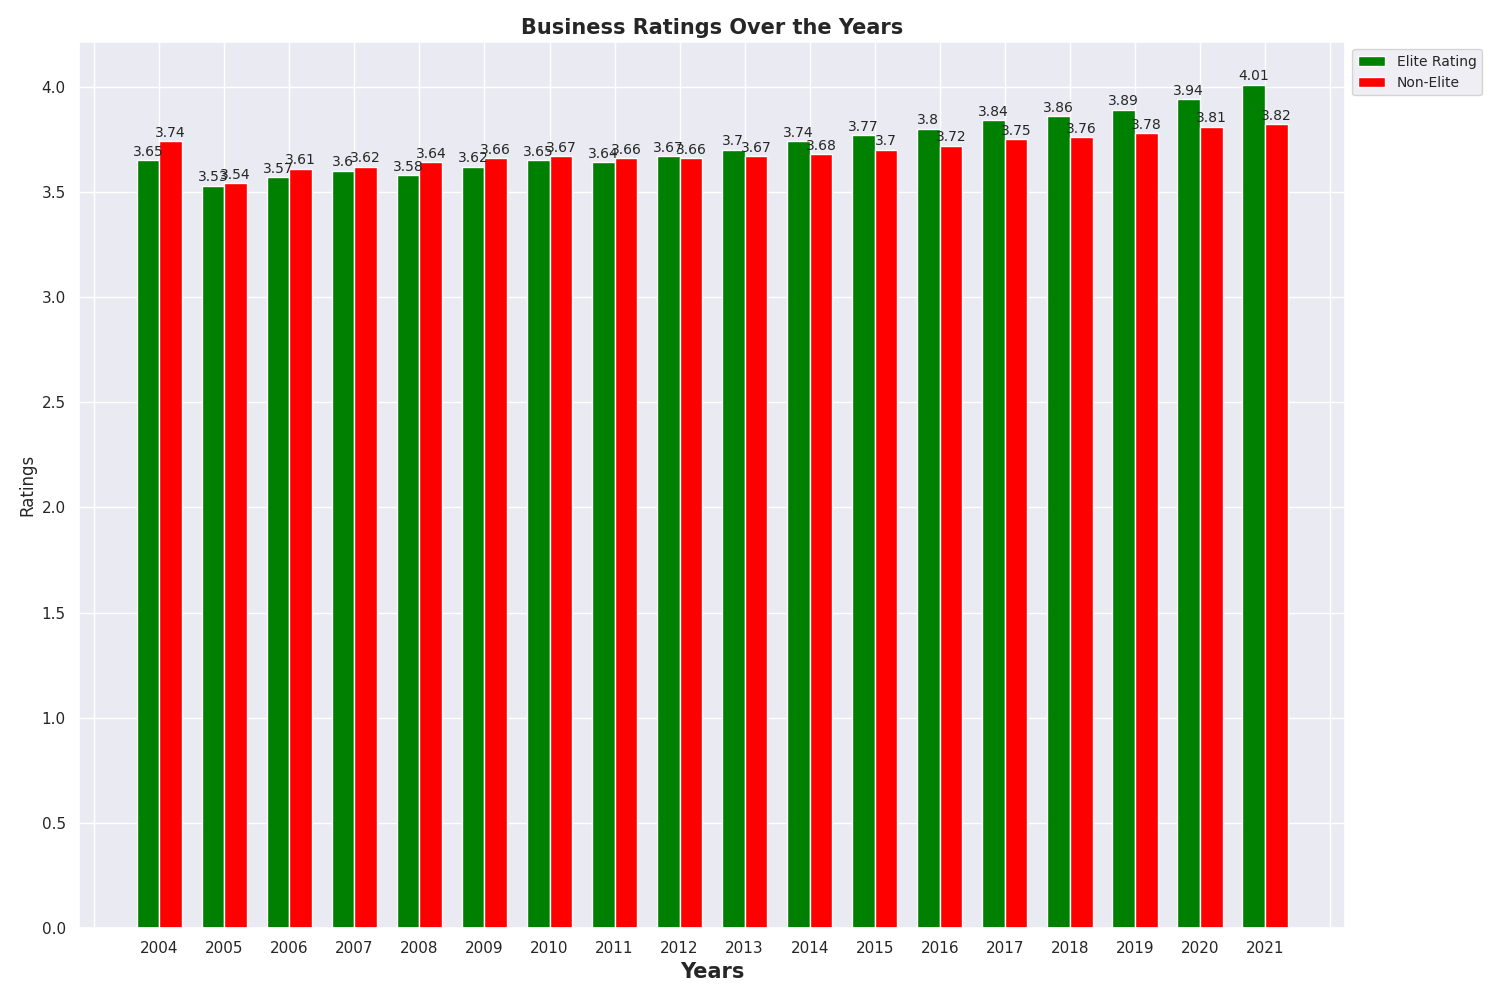

In [43]:
# Plotting Business Stars
import matplotlib.ticker as plticker
labels = avg_plot.year
x = np.arange(len(labels)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
rects1 = ax.bar(x - width/2,avg_plot.elite_bus_ratings,width,color='green', label='Elite Rating')
rects2 = ax.bar(x + width/2,avg_plot.non_elite_bus_ratings,width,color='red', label='Non-Elite')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratings')
ax.set_xlabel('Years',weight='bold', size=15)
ax.set_title('Business Ratings Over the Years',weight='bold', size=15)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=0,ha='center')
ax.legend( bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
ax.bar_label(rects1, padding=1,fontsize=10)
ax.bar_label(rects2, padding=1,fontsize=10)

loc = plticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

fig.tight_layout()
%matplot plt

### Should the elites be trusted?
Despite the analysis done above, it is still a hard question to answer. We saw that based on just counts alone, there is a much higher percentage of non-elite reviewers(85%) than there are elite reviewers(15%). This made it so that review tags such as being voted "useful", "cool" or "funny" couldnt be used in terms of counts to address if elite reviews are found more useful than non-elites.

When Looking at the average rating across reviews and business we can see from the plot that there are some similarities. The years of greatest difference between elite and non-elite are 2004 and 2021 also on average the elites tend to give better ratings than non-elites across both plots. Generally, their ratings tend to be close year by year and this is very interesting when considering the fact that non-elites count is more than tripple that of the elites.

If we were to really dig deeper we would need to draw an equal sample size from each group and then conduct an ANOVA test after determining independence between the samples. Ideally the ANOVA could indicate to us if there is a statistical difference between the two groups. In other words an ANOVA could give us an idea of which group, the elites or non-elites, is providing better or more useful reviews and thereby which group should be trusted more.

Another interesting analysis that could be made would be trying to predict what are the top features that likely determine what makes a person become an elite yelp reviewer. Would it be the number of reviews, number of fans, funny/cool upvotes, years on yelp? It could be any one or a combination of these and that could be a whole other project.